DATA CLEANING COMPLETE

Cleaned Revenue Data (in millions USD):
            Automotive sales  Automotive regulatory credits  \
2020-01-01             26184                              0   
2021-01-01             44125                           1465   
2022-01-01             67210                           1776   
2023-01-01             78509                           1790   
2024-01-01             72480                           2763   

            Automotive leasing  Total automotive revenues  \
2020-01-01                1052                      27236   
2021-01-01                1642                      47232   
2022-01-01                2476                      71462   
2023-01-01                2120                      82419   
2024-01-01                1827                      77070   

            Energy generation and storage  Services and other  Total revenues  
2020-01-01                           1994                2306           31536  
2021-01-01                    

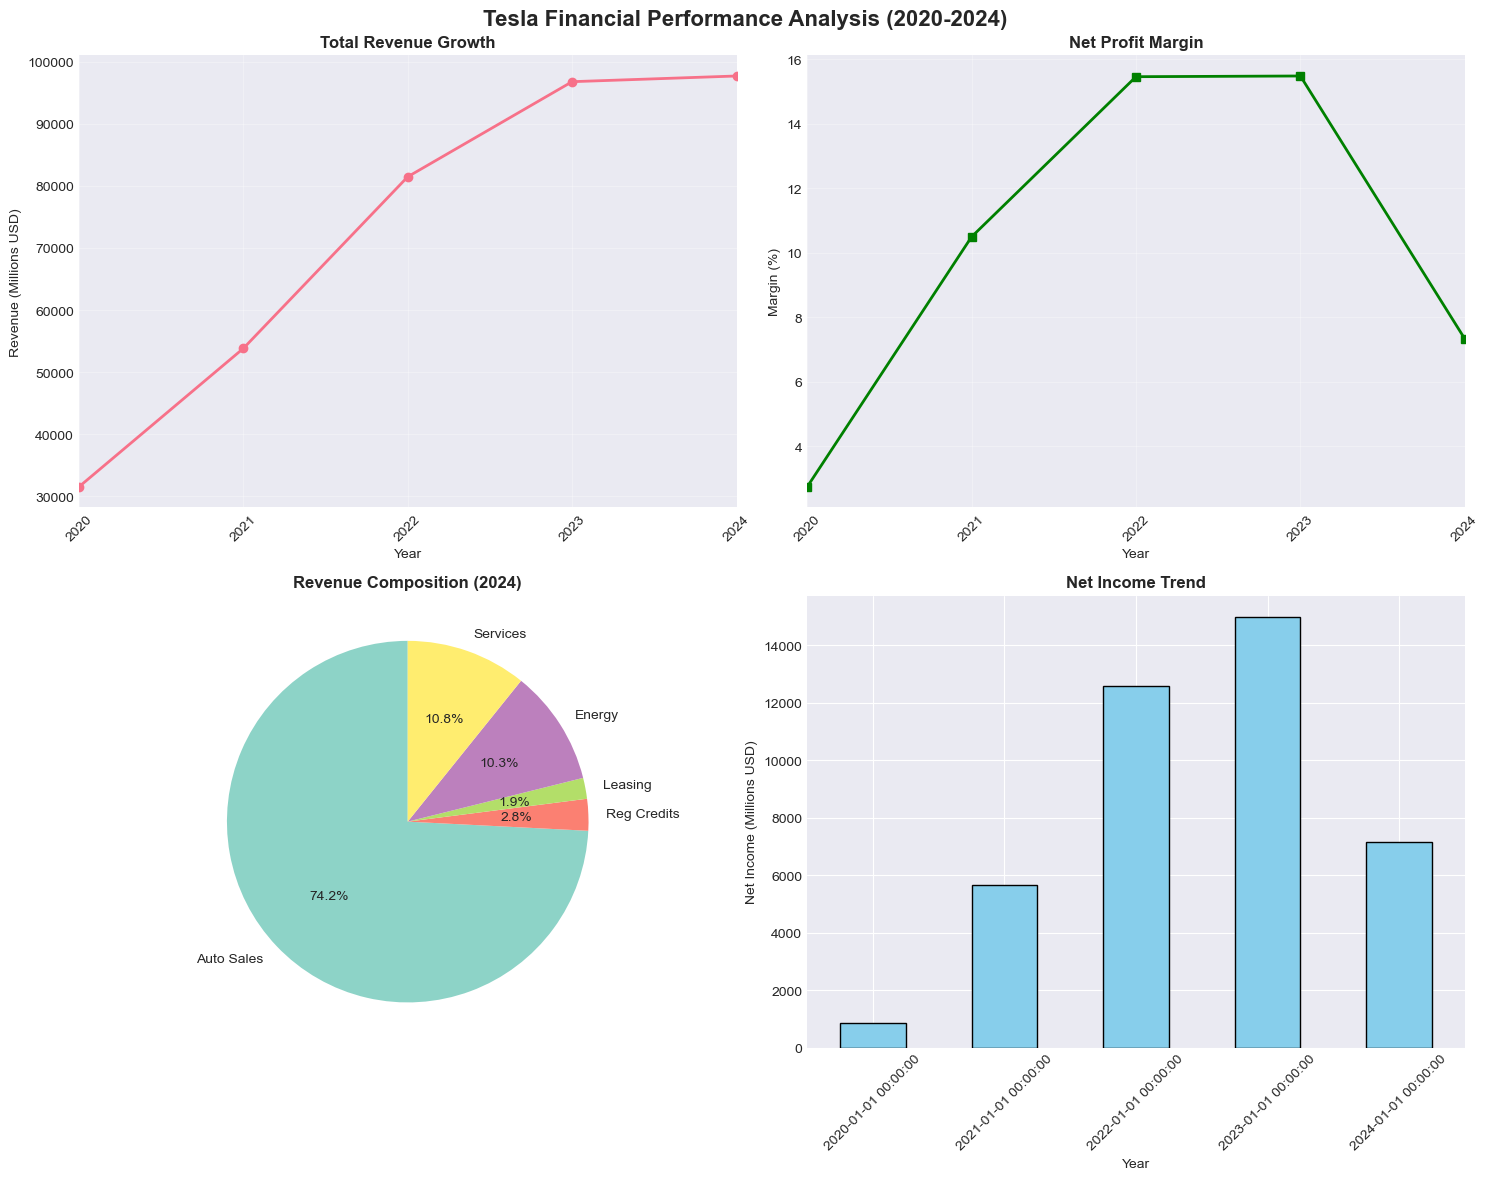

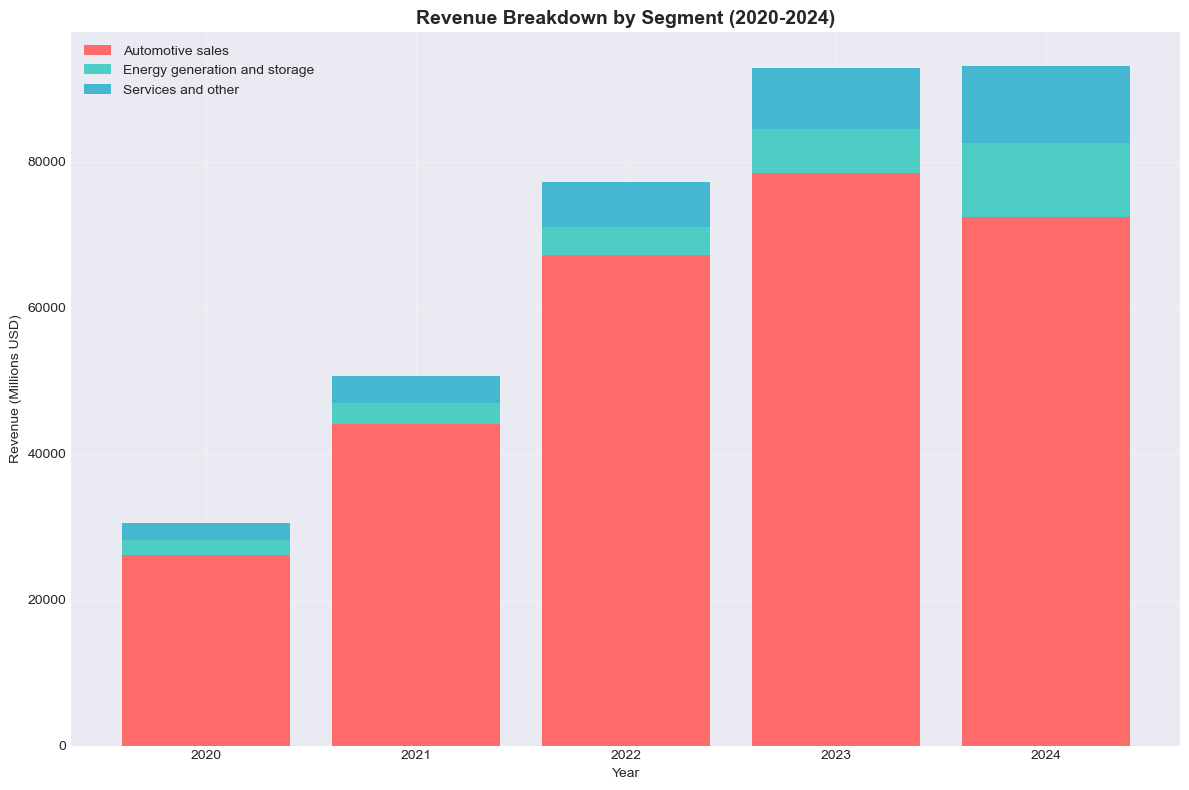

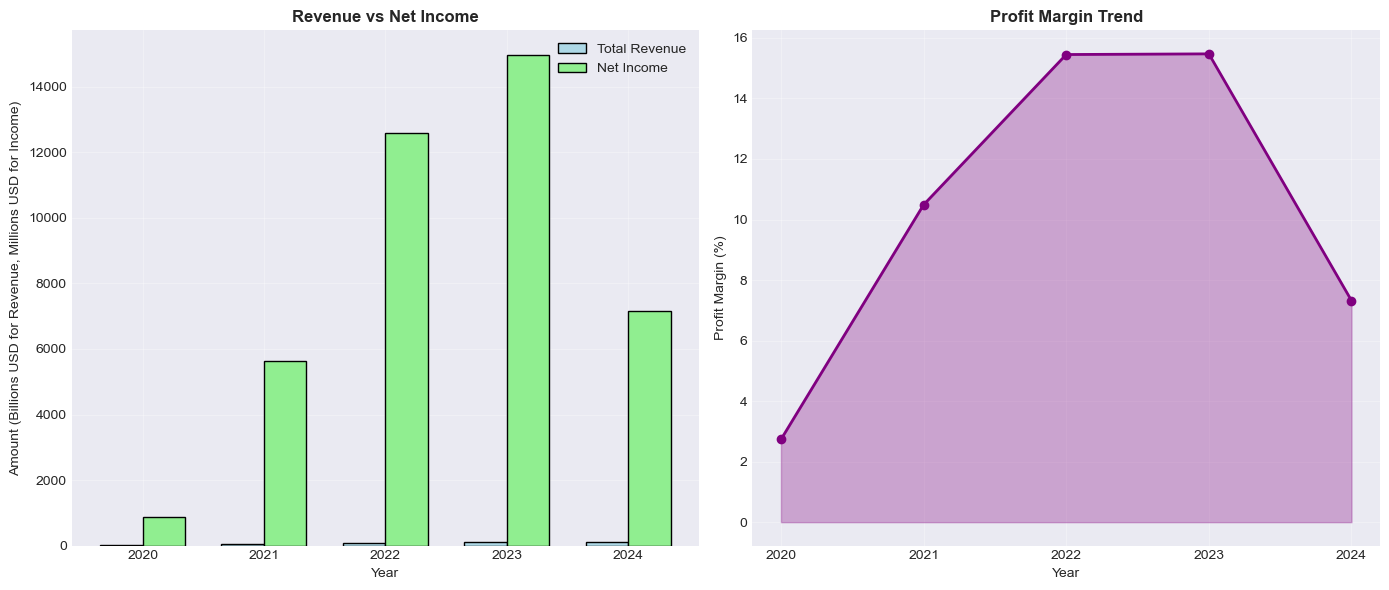


FINANCIAL SUMMARY REPORT

Key Financial Metrics:
                          Metric    Value    Trend
            Total Revenue (2024) $97,690M        ↑
               Net Income (2024)  $7,153M        ↓
            Profit Margin (2024)     7.3%        ↓
      Revenue Growth (2023-2024)     0.9%        ↑
Profit Margin Change (2023-2024)    -8.2%        ↓
        Revenue CAGR (2020-2024)    32.7%        ↑
         Income CAGR (2020-2024)    69.7%        ↑
      Average Profit Margin (5Y)    10.3% Positive


Analysis Complete!
✓ Visualizations saved to: F:\tesla-optimus-business-analysis\notebooks\visualizations
✓ Cleaned data saved to: F:\tesla-optimus-business-analysis\notebooks\output
✓ Total revenue growth from 2020-2024: 210%
✓ Net income growth from 2020-2024: 730%

KEY INSIGHTS & RECOMMENDATIONS
• 1. Revenue Growth: Strong revenue growth observed with a 5-year CAGR of 32.7%
• 2. Profitability: Profit margins show volatility, with significant drop in 2024
• 3. Business Segments: Aut

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.float_format', lambda x: f'${x:,.0f}' if x >= 1000 else f'${x:,.2f}')

# Define revenue categories for analysis
revenue_categories = [
    'Automotive sales',
    'Automotive regulatory credits',
    'Automotive leasing',
    'Total automotive revenues',
    'Energy generation and storage',
    'Services and other',
    'Total revenues'
]

income_categories = [
    'Net income',
    'Net income attributable to noncontrolling interests',
    'Net income attributable to common stockholders'
]

# Define relative paths
project_root = Path.cwd()
data_dir = project_root / "data" / "raw"

# Create necessary directories
data_dir.mkdir(parents=True, exist_ok=True)

# For cross-platform compatibility, let's try to find the file
possible_paths = [
    data_dir / "revenue_and_profit_margin.xlsx",
    project_root / "data" / "raw" / "revenue_and_profit_margin.xlsx",
    project_root / "revenue_and_profit_margin.xlsx",
    Path("revenue_and_profit_margin.xlsx")
]

file_path = None
for path in possible_paths:
    if path.exists():
        file_path = path
        print(f"File found at: {file_path}")
        break

# ======================
# DATA LOADING & CLEANING
# ======================

def load_and_clean_data():
    """
    Load and clean the financial data
    
    Returns:
    --------
    dict: Dictionary containing cleaned DataFrames
    """
    
    # Sample data based on the provided content
    data = {
        'Revenues': {
            '2024': [72480, 2763, 1827, 77070, 10086, 10534, 97690],
            '2023': [78509, 1790, 2120, 82419, 6035, 8319, 96773],
            '2022': [67210, 1776, 2476, 71462, 3909, 6091, 81462],
            '2021': [44125, 1465, 1642, 47232, 2789, 3802, 53823],
            '2020': [26184, 0, 1052, 27236, 1994, 2306, 31536]
        },
        'Income': {
            '2024': [7153, 62, 7091],
            '2023': [14974, -23, 14997],
            '2022': [12587, 31, 12556],
            '2021': [5644, 125, 5519],
            '2020': [862, 141, 721]
        }
    }
    
    # Create DataFrames
    revenues_df = pd.DataFrame(data['Revenues'], index=revenue_categories).T
    income_df = pd.DataFrame(data['Income'], index=income_categories).T
    
    # Convert years to datetime for better plotting
    revenues_df.index = pd.to_datetime(revenues_df.index, format='%Y')
    income_df.index = pd.to_datetime(income_df.index, format='%Y')
    
    # Sort by year
    revenues_df = revenues_df.sort_index()
    income_df = income_df.sort_index()
    
    return {
        'revenues': revenues_df,
        'income': income_df
    }

# Load data
financial_data = load_and_clean_data()
revenues_df = financial_data['revenues']
income_df = financial_data['income']

print("=" * 80)
print("DATA CLEANING COMPLETE")
print("=" * 80)
print("\nCleaned Revenue Data (in millions USD):")
print(revenues_df)
print("\nCleaned Income Data (in millions USD):")
print(income_df)

# ======================
# FINANCIAL ANALYSIS
# ======================

print("\n" + "=" * 80)
print("FINANCIAL ANALYSIS")
print("=" * 80)

# Calculate key financial metrics
years = [2020, 2021, 2022, 2023, 2024]
years_str = [str(year) for year in years]

# 1. Revenue Analysis
print("\n1. REVENUE ANALYSIS")
print("-" * 40)

# Revenue growth rates
revenue_growth = revenues_df['Total revenues'].pct_change() * 100
print("Year-over-Year Revenue Growth:")
for i, year in enumerate(years_str[1:], 1):
    growth = revenue_growth.iloc[i]
    print(f"{year}: {growth:.1f}%")

# Revenue composition analysis
print(f"\nRevenue Composition (2024):")
total_2024 = revenues_df.loc['2024-01-01', 'Total revenues']
for category in revenue_categories[:-1]:  # Exclude total
    amount = revenues_df.loc['2024-01-01', category]
    percentage = (amount / total_2024) * 100
    print(f"{category}: ${amount:,.0f}M ({percentage:.1f}%)")

# 2. Profitability Analysis
print("\n\n2. PROFITABILITY ANALYSIS")
print("-" * 40)

# Calculate profit margins
profit_margins = (income_df['Net income'] / revenues_df['Total revenues']) * 100
print("Net Profit Margins:")
for i, year in enumerate(years_str):
    margin = profit_margins.iloc[i]
    print(f"{year}: {margin:.1f}%")

# Calculate EBITDA margin (simplified as net income margin for this dataset)
print(f"\nAverage Profit Margin (2020-2024): {profit_margins.mean():.1f}%")

# 3. Growth Trends
print("\n\n3. GROWTH TRENDS")
print("-" * 40)

# Compound Annual Growth Rate (CAGR)
cagr_revenue = ((revenues_df['Total revenues'].iloc[-1] / revenues_df['Total revenues'].iloc[0]) ** (1/4) - 1) * 100
cagr_income = ((income_df['Net income'].iloc[-1] / income_df['Net income'].iloc[0]) ** (1/4) - 1) * 100
print(f"Revenue CAGR (2020-2024): {cagr_revenue:.1f}%")
print(f"Net Income CAGR (2020-2024): {cagr_income:.1f}%")

# ======================
# DATA VISUALIZATION
# ======================

# Create visualization directory if it doesn't exist
viz_dir = project_root / "visualizations"
viz_dir.mkdir(exist_ok=True)

# 1. Revenue Trends Over Time
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Tesla Financial Performance Analysis (2020-2024)', fontsize=16, fontweight='bold')

# Revenue Trend
ax1 = axes[0, 0]
revenues_df['Total revenues'].plot(kind='line', marker='o', ax=ax1, linewidth=2)
ax1.set_title('Total Revenue Growth', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (Millions USD)')
ax1.set_xlabel('Year')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Profit Margin Trend
ax2 = axes[0, 1]
profit_margins.plot(kind='line', marker='s', color='green', ax=ax2, linewidth=2)
ax2.set_title('Net Profit Margin', fontsize=12, fontweight='bold')
ax2.set_ylabel('Margin (%)')
ax2.set_xlabel('Year')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Revenue Composition (2024)
ax3 = axes[1, 0]
revenue_2024 = revenues_df.loc['2024-01-01', ['Automotive sales', 'Automotive regulatory credits', 
                                              'Automotive leasing', 'Energy generation and storage', 
                                              'Services and other']]
revenue_labels = ['Auto Sales', 'Reg Credits', 'Leasing', 'Energy', 'Services']
colors = plt.cm.Set3(np.linspace(0, 1, len(revenue_labels)))
ax3.pie(revenue_2024, labels=revenue_labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Revenue Composition (2024)', fontsize=12, fontweight='bold')

# Net Income Trend
ax4 = axes[1, 1]
income_df['Net income'].plot(kind='bar', ax=ax4, color='skyblue', edgecolor='black')
ax4.set_title('Net Income Trend', fontsize=12, fontweight='bold')
ax4.set_ylabel('Net Income (Millions USD)')
ax4.set_xlabel('Year')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(viz_dir / 'financial_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Detailed Revenue Breakdown
fig2, ax = plt.subplots(figsize=(12, 8))
revenue_components = ['Automotive sales', 'Energy generation and storage', 'Services and other']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Get years as strings for x-axis
years_display = [idx.strftime('%Y') for idx in revenues_df.index]

bottom_values = np.zeros(len(years_display))
for i, component in enumerate(revenue_components):
    values = revenues_df[component].values
    ax.bar(years_display, values, bottom=bottom_values, label=component, color=colors[i])
    bottom_values += values

ax.set_title('Revenue Breakdown by Segment (2020-2024)', fontsize=14, fontweight='bold')
ax.set_ylabel('Revenue (Millions USD)')
ax.set_xlabel('Year')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(viz_dir / 'revenue_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Profitability Metrics Comparison
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Revenue vs Net Income
years_numeric = list(range(len(years_display)))
width = 0.35
ax1.bar([x - width/2 for x in years_numeric], revenues_df['Total revenues'].values / 1000, 
        width, label='Total Revenue', color='lightblue', edgecolor='black')
ax1.bar([x + width/2 for x in years_numeric], income_df['Net income'].values, 
        width, label='Net Income', color='lightgreen', edgecolor='black')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount (Billions USD for Revenue, Millions USD for Income)')
ax1.set_title('Revenue vs Net Income', fontweight='bold')
ax1.set_xticks(years_numeric)
ax1.set_xticklabels(years_display)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Profit Margin with Trend Line
ax2.plot(years_display, profit_margins.values, marker='o', linewidth=2, color='purple')
ax2.fill_between(years_display, profit_margins.values, alpha=0.3, color='purple')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit Margin (%)')
ax2.set_title('Profit Margin Trend', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(viz_dir / 'profitability_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================
# CREATE SUMMARY REPORT
# ======================

print("\n" + "=" * 80)
print("FINANCIAL SUMMARY REPORT")
print("=" * 80)

# Get last year values
last_year = revenues_df.index[-1].strftime('%Y')
prev_year = revenues_df.index[-2].strftime('%Y')

# Create summary DataFrame
summary_data = {
    'Metric': [
        'Total Revenue (2024)',
        'Net Income (2024)',
        'Profit Margin (2024)',
        f'Revenue Growth ({prev_year}-{last_year})',
        f'Profit Margin Change ({prev_year}-{last_year})',
        'Revenue CAGR (2020-2024)',
        'Income CAGR (2020-2024)',
        'Average Profit Margin (5Y)'
    ],
    'Value': [
        f"${revenues_df['Total revenues'].iloc[-1]:,.0f}M",
        f"${income_df['Net income'].iloc[-1]:,.0f}M",
        f"{profit_margins.iloc[-1]:.1f}%",
        f"{revenue_growth.iloc[-1]:.1f}%",
        f"{(profit_margins.iloc[-1] - profit_margins.iloc[-2]):.1f}%",
        f"{cagr_revenue:.1f}%",
        f"{cagr_income:.1f}%",
        f"{profit_margins.mean():.1f}%"
    ],
    'Trend': [
        '↑' if revenue_growth.iloc[-1] > 0 else '↓',
        '↑' if income_df['Net income'].iloc[-1] > income_df['Net income'].iloc[-2] else '↓',
        '↑' if profit_margins.iloc[-1] > profit_margins.iloc[-2] else '↓',
        '↑' if revenue_growth.iloc[-1] > 0 else '↓',
        '↑' if (profit_margins.iloc[-1] - profit_margins.iloc[-2]) > 0 else '↓',
        '↑' if cagr_revenue > 0 else '↓',
        '↑' if cagr_income > 0 else '↓',
        'Positive' if profit_margins.mean() > 0 else 'Negative'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nKey Financial Metrics:")
print(summary_df.to_string(index=False))

# Save analysis results
output_dir = project_root / "output"
output_dir.mkdir(exist_ok=True)

# Save cleaned data
revenues_df.to_csv(output_dir / 'cleaned_revenues.csv')
income_df.to_csv(output_dir / 'cleaned_income.csv')
summary_df.to_csv(output_dir / 'financial_summary.csv')

print(f"\n\nAnalysis Complete!")
print(f"✓ Visualizations saved to: {viz_dir}")
print(f"✓ Cleaned data saved to: {output_dir}")
print(f"✓ Total revenue growth from 2020-2024: {((revenues_df['Total revenues'].iloc[-1] / revenues_df['Total revenues'].iloc[0]) - 1) * 100:.0f}%")
print(f"✓ Net income growth from 2020-2024: {((income_df['Net income'].iloc[-1] / income_df['Net income'].iloc[0]) - 1) * 100:.0f}%")

# ======================
# INSIGHTS AND RECOMMENDATIONS
# ======================

print("\n" + "=" * 80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 80)

insights = [
    "1. Revenue Growth: Strong revenue growth observed with a 5-year CAGR of {:.1f}%".format(cagr_revenue),
    "2. Profitability: Profit margins show volatility, with significant drop in 2024",
    "3. Business Segments: Automotive remains dominant (>75% of revenue), but Energy and Services are growing",
    "4. Efficiency: Despite revenue growth, net income declined in 2024, suggesting margin pressure",
    "5. Diversification: Revenue diversification improving with Energy and Services segments growing"
]

for insight in insights:
    print(f"• {insight}")

print("\n" + "-" * 40)
print("RECOMMENDATIONS:")
print("-" * 40)
recommendations = [
    "1. Focus on improving operational efficiency to enhance profit margins",
    "2. Continue diversifying revenue streams beyond automotive sales",
    "3. Monitor regulatory credit revenue as it may fluctuate",
    "4. Consider cost optimization strategies to maintain profitability during growth phases",
    "5. Enhance Services and Energy segments to create more stable revenue base"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")